In [1]:
import pybamm
import matplotlib.pyplot as plt

In [4]:
model1 = pybamm.lithium_ion.DFN()
model2 = pybamm.lithium_ion.DFN({"particle mechanics": "constant cracks"})
param = pybamm.ParameterValues("OKane2023")
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])
var_pts = {"x_n": 20, "x_s": 20, "x_p": 20, "r_n": 30, "r_p": 30}
sim1 = pybamm.Simulation(model1, parameter_values=param, experiment=exp, var_pts=var_pts)
sol1 = sim1.solve()
sim2 = pybamm.Simulation(model2, parameter_values=param, experiment=exp, var_pts=var_pts)
sol2 = sim2.solve()

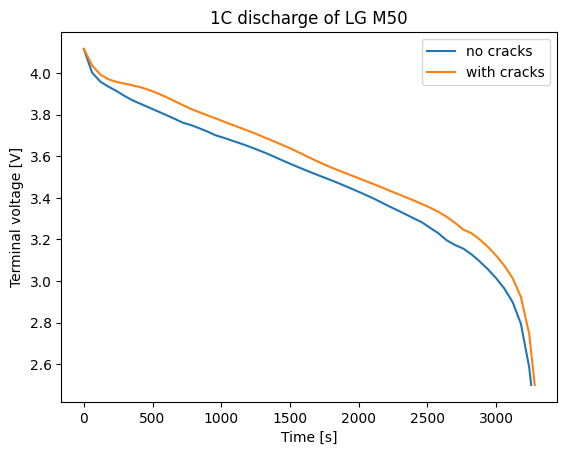

In [5]:
t1 = sol1["Time [s]"].entries
V1 = sol1["Terminal voltage [V]"].entries
t2 = sol2["Time [s]"].entries
V2 = sol2["Terminal voltage [V]"].entries
plt.figure()
plt.plot(t1,V1,label="no cracks")
plt.plot(t2,V2,label="with cracks")
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.title("1C discharge of LG M50")
plt.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/OKane2022_verification/constant_cracks.png")
plt.show()